### 3.2.2 Classification and regression with a two-layer perceptron

#### 3.2.2 Classification of linearly non-separable data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def generateSubsets(n,scenario,sigma_A,sigma_B,verbose=0):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])


    class_A=np.zeros((2,n))
    class_B=np.zeros((2,n))

    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]

    class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
    class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]

    np.random.shuffle(class_A.T)
    np.random.shuffle(class_B.T)

    if scenario == 0:
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B[:,:int(0.5*n)]
        class_A_val=class_A[:,int(0.5*n):]
        class_B_val=class_B[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,class_B_val),axis=1)
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=np.ones((X_val.shape[1]))
        T_val[class_A_val.shape[1]:class_B_val.shape[1]] = -1*T_val[class_A_val.shape[1]:class_B_val.shape[1]]

    if scenario == 1:
        class_A=np.zeros((2,n))
        class_B=np.zeros((2,n))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]
        np.random.shuffle(class_A.T)
        np.random.shuffle(class_B.T)
        
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B
        class_A_val=class_A[:,int(0.5*n):]
        
        
        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,np.shape(X)[1]))))
        T=np.concatenate((np.ones(np.shape(class_A_train)[1]),-np.ones(np.shape(class_B_train)[1])))
        i = np.arange(X.shape[1])
        np.random.shuffle(i)
        X=X[:,i]
        T=T[i]
        #print(X)
        X_val=np.concatenate((class_A_val,np.ones((1,np.shape(class_A_val)[1]))))
        T_val=np.ones((np.shape(class_A_val)[1]))
        i = np.arange(X_val.shape[1])
        np.random.shuffle(i)
        X_val=X_val[:,i]
        T_val=T_val[i]
        
    if scenario == 2:
        class_A_train=class_A
        class_B_train=class_B[:,:int(0.5*n)]
        class_B_val=class_B[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_B_val,np.ones((1,class_B_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))

    if scenario == 3:
        mask_neg = class_A[1,:]<0
        mask_pos = class_A[1,:]>0
  
        class_A_train_neg = class_A[:,mask_neg]
        class_A_train_neg = class_A_train_neg[:,:int(0.2*class_A_train_neg.shape[1])]

        class_A_train_pos = class_A[:,mask_pos]
        class_A_train_pos = class_A_train_pos[:,:int(0.8*class_A_train_pos.shape[1])]
        
        X=np.concatenate((class_A_train_neg,class_A_train_pos),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.ones(X.shape[1])

        X_val = class_B
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))
    """
    i = np.arange(X.shape[1])
    np.random.shuffle(i)
    X=X[:,i]
    T=T[i]


    i = np.arange(X_val.shape[1])
    np.random.shuffle(i)
    X_val=X_val[:,i]
    T_val=T_val[i]

    if verbose:
        #Plotting classes if desired
        if scenario == 3:
            #print(class_A_train_neg.shape)
            #print(class_A_train_pos.shape)
            plt_train_neg, = plt.plot(class_A_train_neg[0,:],class_A_train_neg[1,:],'g^', label='Class A(1,:)<0')
            plt_train_pos, = plt.plot(class_A_train_pos[0,:],class_A_train_pos[1,:],'bs', label='Class A(1,:)>0')
            plt_val, = plt.plot(class_B[0,:],class_B[1,:],'r*', label='Class B validation')
            plt.legend(handles=[plt_train_neg, plt_train_pos])
            plt.show()
        else:
            plt_train_A, = plt.plot(class_A_train[0,:],class_A_train[1,:],'g^', label='Class A training')
            plt_train_B, = plt.plot(class_B_train[0,:],class_B_train[1,:],'bs', label='Class A training')
            
            if scenario==1:
                plt_val, = plt.plot(class_A_val[0,:],class_A_val[1,:],'r*', label='Class A validation')
            else:
                plt_val, = plt.plot(class_B_val[0,:],class_B_val[1,:],'r*', label='Class B validation')

    return X,T,X_val,T_val


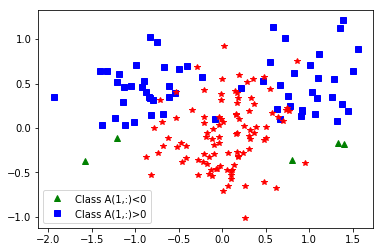

(3, 65)


In [12]:
n=100
scenario=3
sigma_A = 0.4
sigma_B = 0.4
X,T,X_val,T_val = generateSubsets(n,scenario,sigma_A,sigma_B,1)
print(X.shape)

In [13]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.zeros(W.shape)
    dv = np.zeros(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
    weights1.append(W)
    weights2.append(V)
        
    return weights1, weights2,mse_errors,accuracys


In [14]:
def weights_init_MLP(n_in,n_out,scale,hidden):
    W = scale*np.random.randn(hidden,n_in)
    V = scale*np.random.randn(n_out,hidden+1)
    return W,V

In [15]:
def predict(validation,W,V, classification = True):
        #print(validation)
        #print(W.shape)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

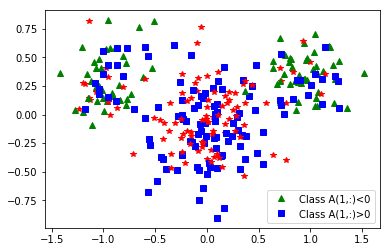

In [20]:
eta = 1e-2
nData = 40
sigma_A = 0.2
sigma_B = 0.3
n_out = 1
scale = 1e-2
#hidden_perceptrons = [2,4,6,8]
hidden_perceptrons = [10,20,40,80]
scenarios = [0,1,2,3]
epochs = 1000

mse_holder = np.zeros((len(hidden_perceptrons),epochs))
mse_val_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_val_holder = np.zeros((len(hidden_perceptrons),epochs))

mse_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))
mse_val_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))
acc_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))
acc_val_data = np.zeros((len(hidden_perceptrons),epochs,len(scenarios)))


#FOR ALL DIFFERENT SUBSETS
for s,dataset in enumerate(scenarios):
    X,T,val_X,val_T = generateSubsets(nData,dataset,sigma_A,sigma_B,1)
    n_in = np.shape(X)[0]
    
    #FOR ALL DIFFERENT NUMBER OF PERCEPTRONS IN HIDDEN LAYER
    for j,nPerceptron in enumerate(hidden_perceptrons):
        W,V = weights_init_MLP(n_in,n_out,scale,nPerceptron)
        W=np.random.randn(hidden_perceptrons[j],np.shape(X)[0])
        V=np.random.randn(1,hidden_perceptrons[j]+1)
        #W = scale*np.random.randn(hidden_perceptrons,np.shape(X)[0])
        #V = scale*np.random.randn(n_out,hidden_perceptrons+1)
        
        #TRAINING
        W_train,V_train,mse,acc = backprop(eta,X,T,W,V,nPerceptron,epochs)

        mse_val = []
        acc_val = []
        W_train = np.array(W_train)
        V_train = np.array(V_train)
        
        #print(W_train[i,:,:].shape)
        
        #PREDICTION
        for i in range(1,W_train.shape[0]):
            p = predict(val_X,W_train[i,:,:],V_train[i,:,:])
            mse_val.append(error_mse(val_T,p))
            acc_val.append(accuracy(val_T,p))
            
        mse_holder[j,:] = mse
        mse_val_holder[j,:] = np.array(mse_val)
        acc_holder[j,:] = acc
        acc_val_holder[j,:] = np.array(acc_val)
    
    mse_data[:,:,s] = mse_holder
    mse_val_data[:,:,s] = mse_val_holder
    acc_data[:,:,s] = acc_holder
    acc_val_data[:,:,s] = acc_val_holder
        
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


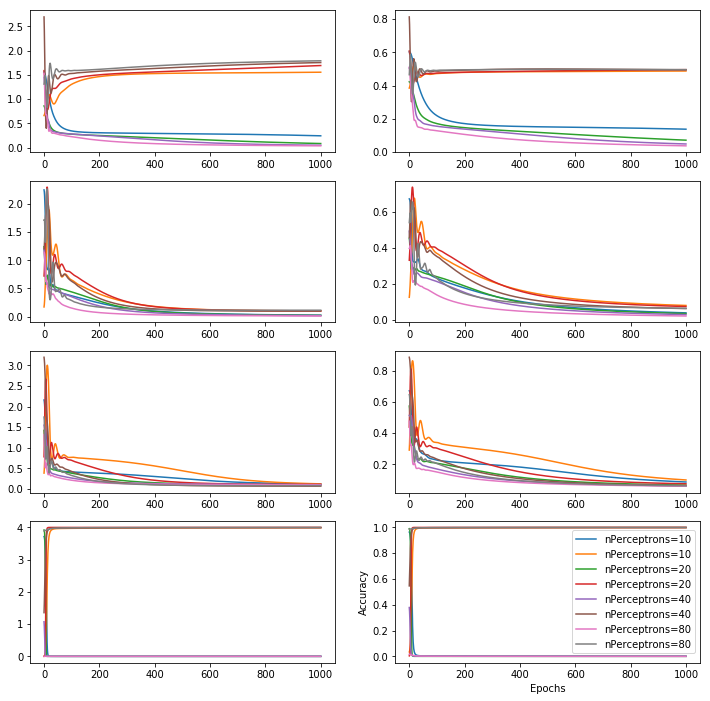

In [21]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)

for plots in range(mse_data.shape[0]):
    ax1.plot(np.linspace(0,epochs,epochs),mse_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax1.plot(np.linspace(0,epochs,epochs),mse_val_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    ax2.plot(np.linspace(0,epochs,epochs),acc_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax2.plot(np.linspace(0,epochs,epochs),acc_val_data[plots,:,0], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    ax3.plot(np.linspace(0,epochs,epochs),mse_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax3.plot(np.linspace(0,epochs,epochs),mse_val_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    ax4.plot(np.linspace(0,epochs,epochs),acc_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax4.plot(np.linspace(0,epochs,epochs),acc_val_data[plots,:,1], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    ax5.plot(np.linspace(0,epochs,epochs),mse_data[plots,:,2], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax5.plot(np.linspace(0,epochs,epochs),mse_val_data[plots,:,2], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    ax6.plot(np.linspace(0,epochs,epochs),acc_data[plots,:,2], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax6.plot(np.linspace(0,epochs,epochs),acc_val_data[plots,:,2], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    ax7.plot(np.linspace(0,epochs,epochs),mse_data[plots,:,3], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax7.plot(np.linspace(0,epochs,epochs),mse_val_data[plots,:,3], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    ax8.plot(np.linspace(0,epochs,epochs),acc_data[plots,:,3], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    ax8.plot(np.linspace(0,epochs,epochs),acc_val_data[plots,:,3], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
                 

plt.show()

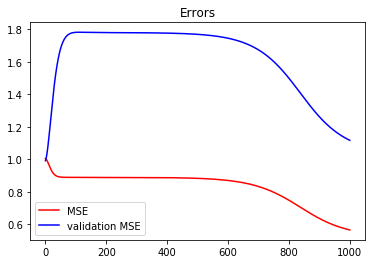

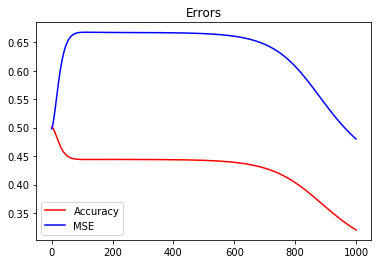

In [30]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt_mse_val, = plt.plot(np.linspace(0,epochs,epochs),mse_val,'b', label='validation MSE')
plt.legend(handles=[plt_mse,plt_mse_val])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'r',label='Accuracy')
plt_acc_val, = plt.plot(np.linspace(0,epochs,epochs),acc_val,'b', label='MSE')
plt.legend(handles=[plt_acc,plt_acc_val])
plt.title('Errors')
plt.show()

0.0